In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [50]:
# read actual data
normal = pd.read_csv('/Users/varyabazilova/Desktop/uu/4_ fieldwork_things/data_sorting/tibet/20210928_AWS_Paiku.csv')

/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
# raw data 
path = '/Users/varyabazilova/Desktop/uu/4_ fieldwork_things/data_sorting/tibet/raw/'
raw = pd.read_csv(path + 'CR1000_Measured_values.dat', skiprows = 1).iloc[2:]

/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [52]:
# rename
raw_renamed = raw.rename(columns= {'RH_prec_Avg': 'RH',  #Mean air relative humidity, %
                                   'Air_temperature_dgC_Avg': 'TAIR', # Mean air temperature, degrees Celsius
                                   'Baro_mBar_Avg': 'PRES', # Mean atmospheric pressure, mbar
                                   'Wind_speed_ms_WVT': 'WSPD', # Mean wind speed, m/s
                                   'WindDir_Dgr_WVT': 'WINDDIR', # Vector mean wind direction, degrees
                                   
                                   
                                   # radiation 
                                   # short
                                   'CNR4_Radiation_short_up_Avg': 'KINC', # Mean outgoing shortwave radiation CNR4, W/m2
                                   'CNR4_Radiation_short_dn_Avg': 'KUPW', # Mean incoming shortwave radiation CNR4, W/m2
                                   
                                   # long
                                   'CNR4_Radiation_long_up_Avg': 'LINC_raw', # Mean raw outgoing longwave radiation CNR4, W/m2
                                   'CNR4_Radiation_long_dn_Avg': 'LUPW_raw', # Mean raw incoming longwave radiation CNR4, W/m2

                                   'Accumulated_RT_NRT_mm_Tot': 'BCON', # Mean bucket content, mm
                                   'Bucket_RT_mm': 'PVOL',  # Measured instantaneous precipitation, mm
                                   
                                   'Pluvio_Status': 'PSTAT', #Status of the pluviometer
                                   'Battery_Vdc_Min' : 'BVOL', #battery voltage, V
                                   'CNR4_Temperature_C_Avg': 'TCNR4', # Mean CNR4 inside temperature, degrees Celsius
                                   
                                   'Measured_distance_m_Max': 'SR50_raw', # Raw distance to the surface (SR50A sensor), m
                                   'Quality_Measured_distance_Avg': 'SR50QUAL', # Quality measurement of the distance to the surface (SR50A sensor), NA
                                   'Wind_U_Avg': 'WIND_U', # Additional wind measurement, NA
                                   'Wind_V_Avg': 'WIND_V' })#, Additional wind measurement, NA

In [53]:
raw_renamed['DATE'] = pd.to_datetime(raw_renamed['TIMESTAMP']).dt.date
raw_renamed['TIME'] = pd.to_datetime(raw_renamed['TIMESTAMP']).dt.time

### corrections

In [54]:
# radiation 

# LINC_corr, Mean corrected incoming longwave radiation CNR4, W/m2
# LUPW_corr, Mean corrected outgoing longwave radiation CNR4, W/m2

# correction:

# =F9+0.00000005670373*((V9+273.15)^4)
# Where in my example F9 is the uncorrected value of LW and V9 is the temperature from this CNR4 sensor. 
# So it's basically adding the black body radiation based in the temperature from CNR4.
# V9 - # TCNR4, Mean CNR4 inside temperature, degrees Celsius

In [55]:
raw_renamed['LUPW_corr'] = raw_renamed.LUPW_raw.astype(float) + 0.00000005670373*((raw_renamed.TCNR4.astype(float) +273.15)**4)
raw_renamed['LINC_corr'] = raw_renamed.LINC_raw.astype(float) + 0.00000005670373*((raw_renamed.TCNR4.astype(float) +273.15)**4)


In [56]:
# sonic ranger 

# correction
# SR50_corr was obtained doing the following : "SR50_raw * SQRT (( TAIR + 273.15 ) / 273.15 )"
# The quality values for the SR50 is good when ranging between 150 and 210 
# (https://s.campbellsci.com/documents/us/manuals/sr50a.pdf).


In [57]:
raw_renamed['SR50_corr'] = raw_renamed.SR50_raw.astype(float) * raw_renamed.TAIR.astype(float).apply(lambda x: math.sqrt((x + 273.15) / 273.15))


### clean up and check 

In [58]:
raw_renamed = raw_renamed.drop(['TIMESTAMP', 'RECORD'], axis = 1)

In [60]:
# Check if the columns are the same, regardless of order
if sorted(raw_renamed.columns) == sorted(normal.columns):
    print("Both DataFrames have the same columns.")
else:
    print("DataFrames have different columns.")

    
# Calculate the columns that are different between the two DataFrames
diff_columns = list(set(raw_renamed.columns) ^ set(normal.columns))

if not diff_columns:
    print("Both DataFrames have the same columns.")
else:
    print("Columns that are different between the two DataFrames:", diff_columns)

DataFrames have different columns.
Columns that are different between the two DataFrames: ['Unnamed: 21', 'WIND_V', 'Unnamed: 22', 'WIND_U']


In [66]:
# rename 
normal2 = normal.rename(columns = {'Unnamed: 21': 'WIND_U', 
                                   'Unnamed: 22': 'WIND_V'})

# clean up the actual data file 
normal2['LUPW_corr'] = normal2['LUPW_corr'].replace('#VALUE!', np.nan)
normal2['LINC_corr'] = normal2['LINC_corr'].replace('#VALUE!', np.nan)


In [65]:
# #radiation 

# fig, ax = plt.subplots(figsize = (20, 5))
# raw_renamed['LINC_raw'].astype(float).plot(label = 'LINC_raw')
# raw_renamed['LUPW_raw'].astype(float).plot(label ='LUPW_raw')

# plt.legend()




In [79]:
raw_renamed


raw_renamed['KUPW']     =raw_renamed['KUPW']     .astype(float) 
raw_renamed['KINC']     =raw_renamed['KINC']     .astype(float)
raw_renamed['LUPW_raw'] =raw_renamed['LUPW_raw'] .astype(float)
raw_renamed['LINC_raw'] =raw_renamed['LINC_raw'] .astype(float)

raw_renamed['RH']       =raw_renamed['RH']       .astype(float)
raw_renamed['TAIR']     =raw_renamed['TAIR']     .astype(float)
raw_renamed['PRES']     =raw_renamed['PRES']     .astype(float)
raw_renamed['WSPD']     =raw_renamed['WSPD']     .astype(float)

raw_renamed['WINDDIR']  =raw_renamed['WINDDIR']  .astype(float)
raw_renamed['SR50_raw'] =raw_renamed['SR50_raw'] .astype(float)
raw_renamed['BCON']     =raw_renamed['BCON']     .astype(float)
raw_renamed['PVOL']     =raw_renamed['PVOL']     .astype(float)
raw_renamed['PSTAT']    =raw_renamed['PSTAT']    .astype(float)
raw_renamed['BVOL']     =raw_renamed['BVOL']     .astype(float)
raw_renamed['TCNR4']    =raw_renamed['TCNR4']    .astype(float)
raw_renamed['SR50QUAL'] =raw_renamed['SR50QUAL'] .astype(float)
raw_renamed['WIND_U']   =raw_renamed['WIND_U']   .astype(float)
raw_renamed['WIND_V']   =raw_renamed['WIND_V']   .astype(float)
raw_renamed['LUPW_corr']=raw_renamed['LUPW_corr'].astype(float)
raw_renamed['LINC_corr']=raw_renamed['LINC_corr'].astype(float) 
raw_renamed['SR50_corr']=raw_renamed['SR50_corr'].astype(float)

<AxesSubplot:>

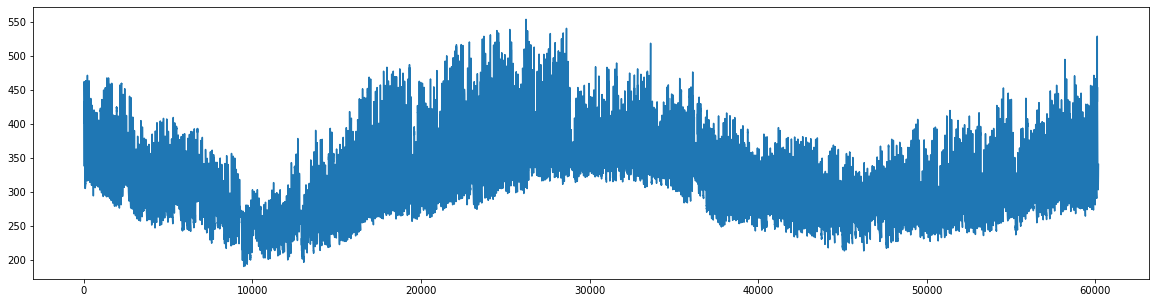

In [119]:
fig, ax = plt.subplots(figsize = (20, 5))


# raw_renamed['KUPW'][:100].plot() 
# raw_renamed['KINC']     .plot()
# raw_renamed['LUPW_raw'] .plot()
# raw_renamed['LINC_raw'] .plot()
# raw_renamed['RH']  .plot()
# raw_renamed['TAIR'].plot()
# raw_renamed['PRES'].plot()
# raw_renamed['WSPD'].plot()

# raw_renamed['WINDDIR'].plot()
# raw_renamed['SR50_raw'].plot()
# raw_renamed['BCON'].plot()
# raw_renamed['PVOL'].plot()

# raw_renamed['PSTAT'].plot()

# raw_renamed['BVOL'].plot()
# normal['BVOL'].plot()

# raw_renamed['TCNR4'].plot()
# raw_renamed['SR50QUAL'].plot()
# normal['SR50QUAL'].plot()

# raw_renamed['WIND_U'].plot()
# # raw_renamed['WIND_V'].plot()
# raw_renamed['LUPW_corr'].plot()
# raw_renamed['LINC_corr'].plot()
# raw_renamed['SR50_corr'].plot()

## append 

In [128]:
new_data = normal2.append(raw_renamed, ignore_index=True)

In [129]:
# normal 9/23/2021 3:00

new_data

,DATE,TIME,KUPW,KINC,LUPW_raw,LUPW_corr,LINC_raw,LINC_corr,RH,TAIR,...,PVOL,BCON,PSTAT,BVOL,SR50_raw,SR50_corr,SR50QUAL,TCNR4,WIND_U,WIND_V
0,10/29/2019,5:15:00,79.10,510.10,17.300,368.6,-140.10,211.2,14.76,1.140,...,0.0,468.90,0.0,14.29,1.882,1.886000,194.2,7.400,0.020,0.130
1,10/29/2019,5:30:00,130.00,792.50,31.100,379.6,-134.70,213.8,16.16,1.020,...,0.0,468.90,0.0,14.23,1.881,1.885000,196.5,6.840,-0.210,0.680
2,10/29/2019,5:45:00,135.00,725.40,30.000,378.5,-126.40,222.1,16.43,1.060,...,0.0,468.90,0.0,14.25,1.879,1.883000,196.0,6.850,0.590,-0.050
3,10/29/2019,6:00:00,154.10,635.90,18.100,367.8,-113.50,236.2,16.95,1.000,...,0.0,468.90,0.0,14.25,1.879,1.882000,195.2,7.090,0.080,0.890
4,10/29/2019,6:15:00,173.60,713.40,25.500,377.9,-115.40,237.0,16.28,1.220,...,0.0,469.00,0.0,14.25,1.878,1.882000,196.6,7.620,0.130,0.460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126897,2023-06-12,01:30:00,32.66,46.90,0.350,327.946904,-25.60,301.996904,65.98,2.380,...,857.0,0.00,0.0,13.75,1.804,1.811842,184.1,2.547,-0.036,-0.065
126898,2023-06-12,01:45:00,28.57,70.51,0.507,330.960243,-27.91,302.543243,64.34,3.157,...,857.0,0.00,0.0,14.18,1.802,1.812384,182.2,3.146,0.055,-0.032
126899,2023-06-12,02:00:00,42.04,111.60,1.785,335.146927,-34.67,298.691927,63.37,3.410,...,857.0,0.00,0.0,14.41,1.801,1.812207,186.1,3.752,0.063,0.218
126900,2023-06-12,02:15:00,51.77,144.90,3.272,338.404767,-38.28,296.852767,65.92,2.964,...,857.0,0.00,0.0,14.41,1.802,1.811751,191.1,4.119,-0.076,0.223


In [131]:

new_data['KUPW']     =new_data['KUPW']     .astype(float) 
new_data['KINC']     =new_data['KINC']     .astype(float)
new_data['LUPW_raw'] =new_data['LUPW_raw'] .astype(float)
new_data['LINC_raw'] =new_data['LINC_raw'] .astype(float)
new_data['RH']       =new_data['RH']       .astype(float)
new_data['TAIR']     =new_data['TAIR']     .astype(float)
new_data['PRES']     =new_data['PRES']     .astype(float)
new_data['WSPD']     =new_data['WSPD']     .astype(float)
new_data['WINDDIR']  =new_data['WINDDIR']  .astype(float)
new_data['SR50_raw'] =new_data['SR50_raw'] .astype(float)
new_data['BCON']     =new_data['BCON']     .astype(float)
new_data['PVOL']     =new_data['PVOL']     .astype(float)
new_data['PSTAT']    =new_data['PSTAT']    .astype(float)
new_data['BVOL']     =new_data['BVOL']     .astype(float)
new_data['TCNR4']    =new_data['TCNR4']    .astype(float)
new_data['SR50QUAL'] =new_data['SR50QUAL'] .astype(float)
new_data['WIND_U']   =new_data['WIND_U']   .astype(float)
new_data['WIND_V']   =new_data['WIND_V']   .astype(float)
new_data['LUPW_corr']=new_data['LUPW_corr'].astype(float)
new_data['LINC_corr']=new_data['LINC_corr'].astype(float) 
new_data['SR50_corr']=new_data['SR50_corr'].astype(float)

<AxesSubplot:>

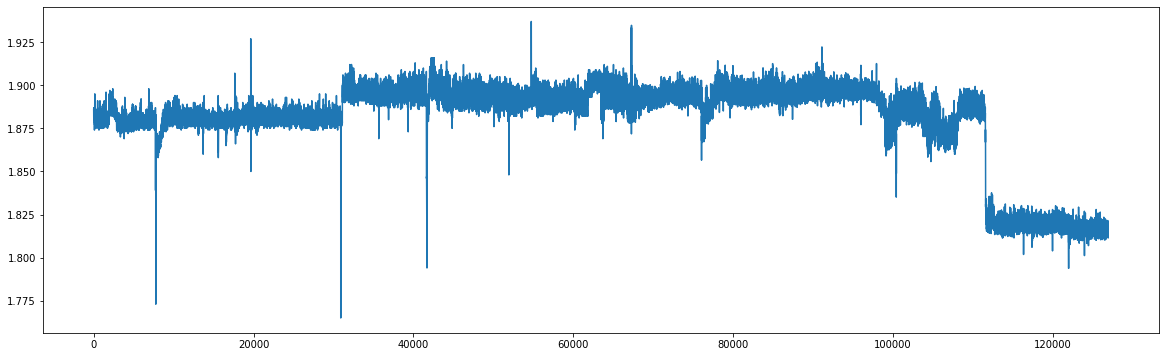

In [160]:
plt.figure(figsize = (20, 6))

# new_data['KUPW'].plot() 
# raw_renamed['KUPW'].plot() 

# new_data['KINC'].plot()
# new_data['LUPW_raw'].plot()
# new_data['LINC_raw'].plot()
# new_data['RH'].plot()
# new_data['TAIR'].plot()
# new_data['PRES'].plot()
# new_data['WSPD'].plot()
# new_data['WINDDIR'].plot()
# new_data['SR50_raw'].plot()
# new_data['BCON'].plot()
# new_data['PVOL'].plot()

# new_data['PSTAT'].plot()
# new_data['BVOL'].plot()
# new_data['TCNR4'].plot()
# new_data['SR50QUAL'].plot()
# new_data['WIND_U'].plot()
# new_data['WIND_V'].plot()
# new_data['LUPW_corr'].plot()
# new_data['LINC_corr'].plot()
# new_data['SR50_corr'].plot()

In [162]:
# new_data.to_csv('20230612_AWS_Paiku.csv')

In [164]:
# new_data

## old data - to check 

In [31]:
# old raw data

data_202009 = pd.read_csv('/Users/varyabazilova/Desktop/uu/4_ fieldwork_things/data_sorting/tibet/previous_raw/202009/CR1000_Measured_values.dat', skiprows = 1).iloc[2:]
data_202105 = pd.read_csv('/Users/varyabazilova/Desktop/uu/4_ fieldwork_things/data_sorting/tibet/previous_raw/202105/CR1000_2_Measured_values.dat', skiprows = 1).iloc[2:]
data_202109 = pd.read_csv('/Users/varyabazilova/Desktop/uu/4_ fieldwork_things/data_sorting/tibet/previous_raw/202109/CR1000_Measured_values.dat', skiprows = 1).iloc[2:]
data_202306 = pd.read_csv('/Users/varyabazilova/Desktop/uu/4_ fieldwork_things/data_sorting/tibet/previous_raw/202306/CR1000_Measured_values.dat', skiprows = 1).iloc[2:]



/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/varyabazilova/opt/anaconda3/envs/project1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


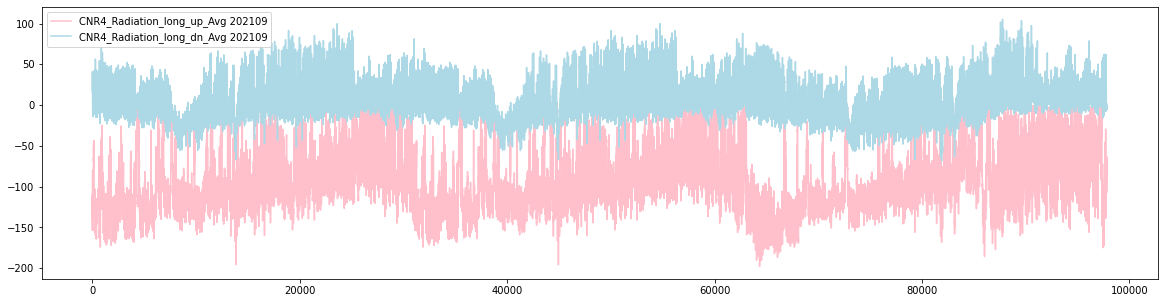

In [42]:
fig, ax = plt.subplots(figsize = (20, 5))
# data_202009
# data_202009['CNR4_Radiation_long_up_Avg'].astype(float).plot(label = 'CNR4_Radiation_long_up_Avg 202009', color = 'red') # outgoing
# data_202009['CNR4_Radiation_long_dn_Avg'].astype(float).plot(label ='CNR4_Radiation_long_dn_Avg 202009', color = 'blue') # incoming

# data_202105
# data_202105['CNR4_Radiation_long_up_Avg'].astype(float).plot(label = 'CNR4_Radiation_long_up_Avg 202105', color = 'pink') # outgoing
# data_202105['CNR4_Radiation_long_dn_Avg'].astype(float).plot(label ='CNR4_Radiation_long_dn_Avg 202105', color = 'lightblue') # incoming


# data_202109
data_202109['CNR4_Radiation_long_up_Avg'].astype(float).plot(label = 'CNR4_Radiation_long_up_Avg 202109', color = 'pink') # outgoing
data_202109['CNR4_Radiation_long_dn_Avg'].astype(float).plot(label ='CNR4_Radiation_long_dn_Avg 202109', color = 'lightblue') # incoming




plt.legend()

In [26]:
old_raw.TIMESTAMP

2        2019-10-29 05:00:00
3        2019-10-29 05:15:00
4        2019-10-29 05:30:00
5        2019-10-29 05:45:00
6        2019-10-29 06:00:00
                ...         
97826    2021-09-23 02:00:00
97827    2021-09-23 02:15:00
97828    2021-09-23 02:30:00
97829    2021-09-23 02:45:00
97830    2021-09-23 03:00:00
Name: TIMESTAMP, Length: 97829, dtype: object

In [27]:
raw.TIMESTAMP

2        2021-09-23 03:15:00
3        2021-09-23 03:30:00
4        2021-09-23 03:45:00
5        2021-09-23 04:00:00
6        2021-09-23 04:15:00
                ...         
60187    2023-06-12 01:30:00
60188    2023-06-12 01:45:00
60189    2023-06-12 02:00:00
60190    2023-06-12 02:15:00
60191    2023-06-12 02:30:00
Name: TIMESTAMP, Length: 60190, dtype: object